# 230968126 ML Lab Week 3

Name :- Kewal Thacker, Section :- A1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import sklearn 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exercise 1

Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

In [2]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.drop(columns = ['Unnamed: 9','Unnamed: 10','Unnamed: 11'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Compute mean & standard deviation, tabulate and visualize the age of the patients. 

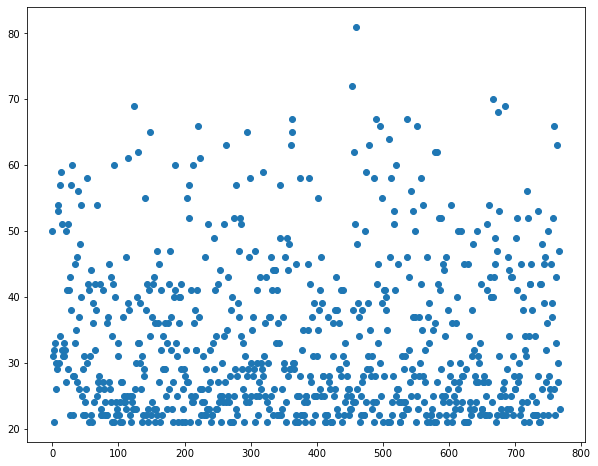

In [16]:
mean = df['Age'].mean()
std_dev = df['Age'].std()
pl.figure(figsize = (10,8))
pl.scatter(x = df.index,y = df['Age'])

Analyze and tabulate the relationship of age, BMI of patients with respect to the class. 

In [18]:
print("Tabular Summary:",
         "Mean: ",mean,
         "StandardDev: ",std_dev)

Tabular Summary: Mean:  33.240885416666664 StandardDev:  11.76023154067868


<AxesSubplot:>

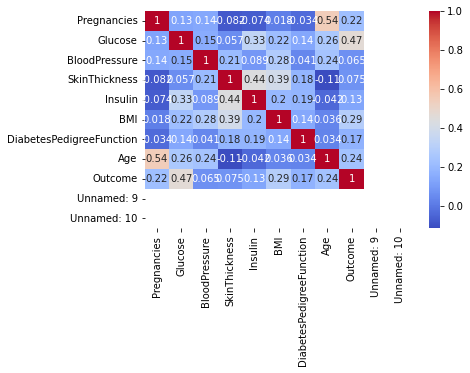

In [24]:
correl = df.corr()
sns.heatmap(correl,annot = True,cmap = 'coolwarm')

Tabulate the class label and comment on whether the classes are balanced. 

In [23]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

No the classes are not balanced

Use the data set to build a logistic regression model (using sklearn) and predict the class 
label. Divide the dataset into training and test set (70,30) using train_test_split method in 
sklearn.  

In [63]:
from sklearn.model_selection import train_test_split
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state = 43)


In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train,y_train)

y_test = np.array(y_test)
y_pred = logreg.predict(X_test)

Use the test data set and evaluate the performance using a confusion matrix. Visualize 
the confusion matrix using a heat map. 

In [65]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       152
           1       0.81      0.56      0.66        79

    accuracy                           0.81       231
   macro avg       0.81      0.75      0.76       231
weighted avg       0.81      0.81      0.79       231




Confusion Matrix:


<AxesSubplot:>

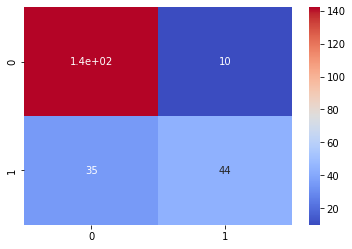

In [67]:
print("\nConfusion Matrix:")
cmatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cmatrix,annot = True,cmap = 'coolwarm')

In [68]:
cmatrix

array([[142,  10],
       [ 35,  44]], dtype=int64)

Visualize the ROC curve, and comment on the performance of the classifier. 

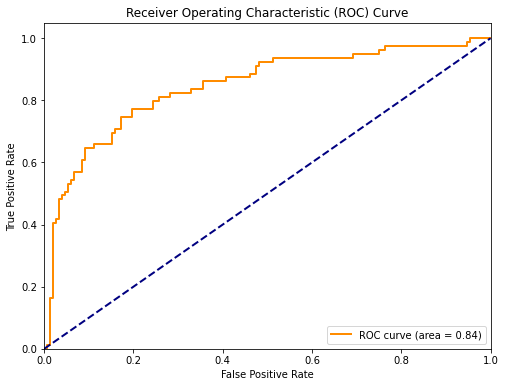

AUC Score: 0.84


In [70]:
from sklearn.metrics import roc_curve, auc
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

pl.figure(figsize=(8, 6))
pl.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier (diagonal line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver Operating Characteristic (ROC) Curve')
pl.legend(loc="lower right")
pl.show()

# Print the AUC score for model performance evaluation
print(f"AUC Score: {roc_auc:.2f}")